# 오분류 데이터 분석(두피유형: 모낭홍반농포)

### 클래스 4

In [4]:
import pandas as pd
import matplotlib as plt

In [36]:
df = pd.read_csv('./data/error(efficientnet_b1_focal-loss_cosine_lr=1e-3).csv')

In [27]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [17]:
df.head()

,epoch,filename,true_label,predicted_label
0,0,./data/validation/[원천]모낭홍반농포_0.양호/6995_A2LEBJJ...,[원천]모낭홍반농포_0.양호,[원천]모낭홍반농포_1.경증
1,0,./data/validation/[원천]모낭홍반농포_0.양호/7027_A2LEBJJ...,[원천]모낭홍반농포_0.양호,[원천]모낭홍반농포_1.경증
2,0,./data/validation/[원천]모낭홍반농포_0.양호/7027_A2LEBJJ...,[원천]모낭홍반농포_0.양호,[원천]모낭홍반농포_1.경증
3,0,./data/validation/[원천]모낭홍반농포_0.양호/7027_A2LEBJJ...,[원천]모낭홍반농포_0.양호,[원천]모낭홍반농포_1.경증
4,0,./data/validation/[원천]모낭홍반농포_0.양호/7027_A2LEBJJ...,[원천]모낭홍반농포_0.양호,[원천]모낭홍반농포_1.경증


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9730 entries, 0 to 9729
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   epoch            9730 non-null   int64 
 1   filename         9730 non-null   object
 2   true_label       9730 non-null   object
 3   predicted_label  9730 non-null   object
dtypes: int64(1), object(3)
memory usage: 304.2+ KB


In [19]:
df['epoch'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

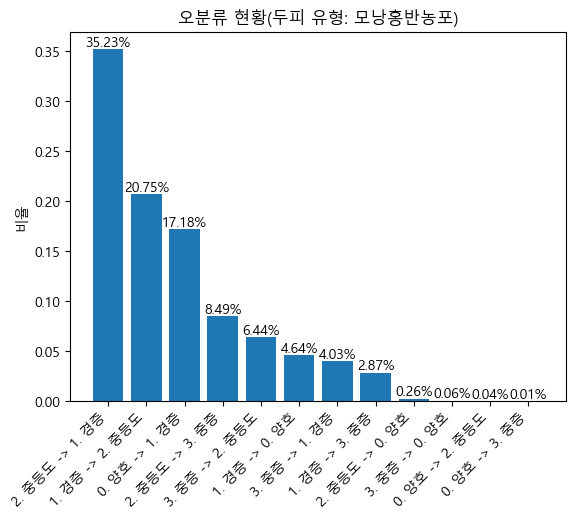

In [39]:
# 전체 데이터 개수
total_data_count = len(df)

# 조건을 만족하는 데이터 개수를 구하는 함수
def get_count(true_condition, pred_condition):
    return len(df[(df['true_label'] == true_condition) & (df['predicted_label'] == pred_condition)])

# 간단하게 표시될 true_label과 predicted_label 값 정의
labels_map = {
    '[원천]모낭홍반농포_0.양호': '0. 양호',
    '[원천]모낭홍반농포_1.경증': '1. 경증',
    '[원천]모낭홍반농포_2.중등도': '2. 중등도',
    '[원천]모낭홍반농포_3.중증': '3. 중증'
}

# 전체 경우의 수 (true_label과 predicted_label이 같지 않은 경우만 포함)
true_labels = [
    '[원천]모낭홍반농포_0.양호', 
    '[원천]모낭홍반농포_1.경증', 
    '[원천]모낭홍반농포_2.중등도', 
    '[원천]모낭홍반농포_3.중증'
]
pred_labels = [
    '[원천]모낭홍반농포_0.양호', 
    '[원천]모낭홍반농포_1.경증', 
    '[원천]모낭홍반농포_2.중등도', 
    '[원천]모낭홍반농포_3.중증'
]

# true_label과 predicted_label이 같지 않은 경우만 포함
conditions = [(true, pred) for true in true_labels for pred in pred_labels if true != pred]
counts = [get_count(true, pred) for true, pred in conditions]
ratios = [count / total_data_count for count in counts]  # 비율 계산
labels = [f'{labels_map[true]} -> {labels_map[pred]}' for true, pred in conditions]

# 비율을 기준으로 내림차순 정렬
sorted_data = sorted(zip(ratios, labels), reverse=True)
sorted_ratios, sorted_labels = zip(*sorted_data)

# 바 그래프 그리기 (정렬된 데이터 사용)
plt.figure()
bars = plt.bar(sorted_labels, sorted_ratios)  # 정렬된 비율로 출력

# 각 바 위에 비율 출력 (소수점 2자리까지)
for bar, ratio in zip(bars, sorted_ratios):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{ratio:.2%}', ha='center', va='bottom')

plt.title('오분류 현황(두피 유형: 모낭홍반농포)')
plt.ylabel('비율')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

1. 55.98%가 경증과 중증도를 구분하지 못함
2. 22.15%가 양호와 증상(경증, 중증도, 중증)을 구분하지 못함

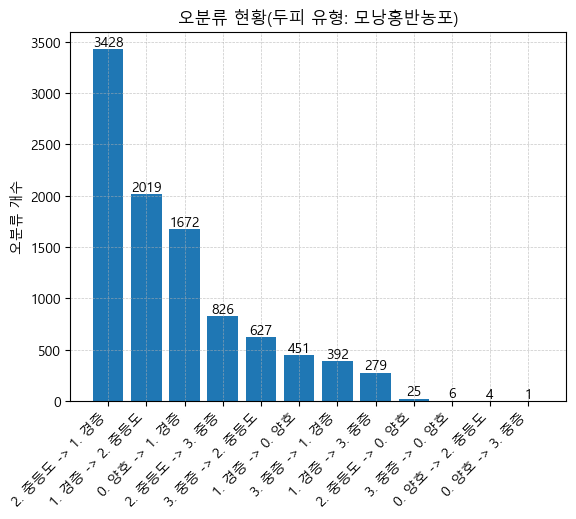

In [57]:
# 전체 데이터 개수
total_data_count = len(df)

# 조건을 만족하는 데이터 개수를 구하는 함수
def get_count(true_condition, pred_condition):
    return len(df[(df['true_label'] == true_condition) & (df['predicted_label'] == pred_condition)])

# 간단하게 표시될 true_label과 predicted_label 값 정의
labels_map = {
    '[원천]모낭홍반농포_0.양호': '0. 양호',
    '[원천]모낭홍반농포_1.경증': '1. 경증',
    '[원천]모낭홍반농포_2.중등도': '2. 중등도',
    '[원천]모낭홍반농포_3.중증': '3. 중증'
}

# 전체 경우의 수 (true_label과 predicted_label이 같지 않은 경우만 포함)
true_labels = [
    '[원천]모낭홍반농포_0.양호', 
    '[원천]모낭홍반농포_1.경증', 
    '[원천]모낭홍반농포_2.중등도', 
    '[원천]모낭홍반농포_3.중증'
]
pred_labels = [
    '[원천]모낭홍반농포_0.양호', 
    '[원천]모낭홍반농포_1.경증', 
    '[원천]모낭홍반농포_2.중등도', 
    '[원천]모낭홍반농포_3.중증'
]

# true_label과 predicted_label이 같지 않은 경우만 포함
conditions = [(true, pred) for true in true_labels for pred in pred_labels if true != pred]
counts = [get_count(true, pred) for true, pred in conditions]
labels = [f'{labels_map[true]} -> {labels_map[pred]}' for true, pred in conditions]

# 개수를 기준으로 내림차순 정렬
sorted_data = sorted(zip(counts, labels), reverse=True)
sorted_counts, sorted_labels = zip(*sorted_data)

# 바 그래프 그리기 (정렬된 데이터 사용)
plt.figure()
bars = plt.bar(sorted_labels, sorted_counts)  # 정렬된 개수로 출력

# 각 바 위에 개수 출력
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}', ha='center', va='bottom')

plt.title('오분류 현황(두피 유형: 모낭홍반농포)')
plt.ylabel('오분류 개수')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# plt.tight_layout()
plt.show()

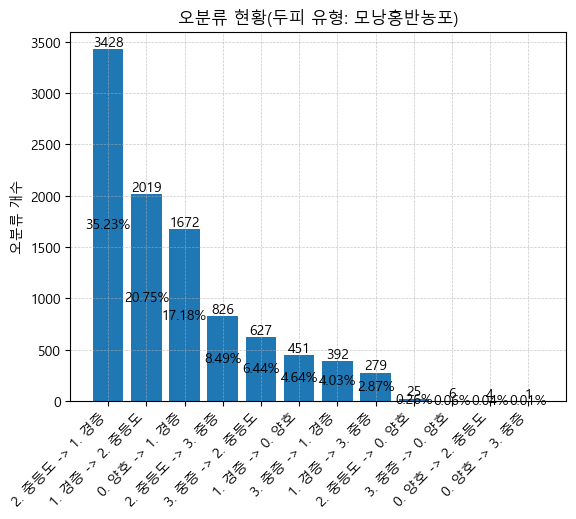

In [56]:
# 전체 데이터 개수
total_data_count = len(df)

# 조건을 만족하는 데이터 개수를 구하는 함수
def get_count(true_condition, pred_condition):
    return len(df[(df['true_label'] == true_condition) & (df['predicted_label'] == pred_condition)])

# 간단하게 표시될 true_label과 predicted_label 값 정의
labels_map = {
    '[원천]모낭홍반농포_0.양호': '0. 양호',
    '[원천]모낭홍반농포_1.경증': '1. 경증',
    '[원천]모낭홍반농포_2.중등도': '2. 중등도',
    '[원천]모낭홍반농포_3.중증': '3. 중증'
}

# 전체 경우의 수 (true_label과 predicted_label이 같지 않은 경우만 포함)
true_labels = [
    '[원천]모낭홍반농포_0.양호', 
    '[원천]모낭홍반농포_1.경증', 
    '[원천]모낭홍반농포_2.중등도', 
    '[원천]모낭홍반농포_3.중증'
]
pred_labels = [
    '[원천]모낭홍반농포_0.양호', 
    '[원천]모낭홍반농포_1.경증', 
    '[원천]모낭홍반농포_2.중등도', 
    '[원천]모낭홍반농포_3.중증'
]

# true_label과 predicted_label이 같지 않은 경우만 포함
conditions = [(true, pred) for true in true_labels for pred in pred_labels if true != pred]
counts = [get_count(true, pred) for true, pred in conditions]
ratios = [count / total_data_count for count in counts]  # 비율 계산
labels = [f'{labels_map[true]} -> {labels_map[pred]}' for true, pred in conditions]

# 개수를 기준으로 내림차순 정렬
sorted_data = sorted(zip(counts, ratios, labels), reverse=True)
sorted_counts, sorted_ratios, sorted_labels = zip(*sorted_data)

# 바 그래프 그리기 (정렬된 데이터 사용)
plt.figure()
bars = plt.bar(sorted_labels, sorted_counts)  # 정렬된 개수로 출력

# 각 바 위에 개수 출력
for bar, count, ratio in zip(bars, sorted_counts, sorted_ratios):
    # 개수는 막대 위에 표시
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}', ha='center', va='bottom')
    # 비율은 막대 가운데에 표시
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{ratio:.2%}', ha='center', va='center')

plt.title('오분류 현황(두피 유형: 모낭홍반농포)')
plt.ylabel('오분류 개수')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# plt.tight_layout()
plt.show()

### 클래스 3

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('./data/error(efficientnet_b1_focal-loss_cosine_lr=1e-3_class-3_epoch10).csv')

In [31]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

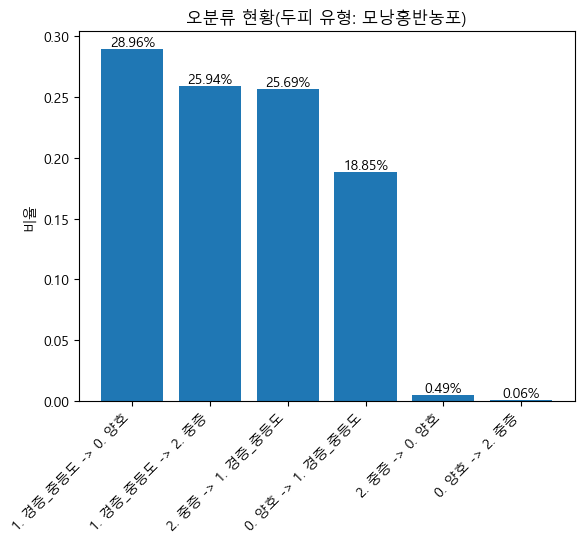

In [24]:
# 전체 데이터 개수
total_data_count = len(df)

# 조건을 만족하는 데이터 개수를 구하는 함수
def get_count(true_condition, pred_condition):
    return len(df[(df['true_label'] == true_condition) & (df['predicted_label'] == pred_condition)])

# 간단하게 표시될 true_label과 predicted_label 값 정의
labels_map = {
    '[원천]모낭홍반농포_0.양호': '0. 양호',
    '[원천]모낭홍반농포_1.경증_중등도': '1. 경증_중등도',
    '[원천]모낭홍반농포_2.중증': '2. 중증'
}

# 전체 경우의 수 (true_label과 predicted_label이 같지 않은 경우만 포함)
true_labels = [
    '[원천]모낭홍반농포_0.양호', 
    '[원천]모낭홍반농포_1.경증_중등도', 
    '[원천]모낭홍반농포_2.중증'
]
pred_labels = [
    '[원천]모낭홍반농포_0.양호', 
    '[원천]모낭홍반농포_1.경증_중등도', 
    '[원천]모낭홍반농포_2.중증'
]

# true_label과 predicted_label이 같지 않은 경우만 포함
conditions = [(true, pred) for true in true_labels for pred in pred_labels if true != pred]
counts = [get_count(true, pred) for true, pred in conditions]
ratios = [count / total_data_count for count in counts]  # 비율 계산
labels = [f'{labels_map[true]} -> {labels_map[pred]}' for true, pred in conditions]

# 비율을 기준으로 내림차순 정렬
sorted_data = sorted(zip(ratios, labels), reverse=True)
sorted_ratios, sorted_labels = zip(*sorted_data)

# 바 그래프 그리기 (정렬된 데이터 사용)
plt.figure()
bars = plt.bar(sorted_labels, sorted_ratios)  # 정렬된 비율로 출력

# 각 바 위에 비율 출력 (소수점 2자리까지)
for bar, ratio in zip(bars, sorted_ratios):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{ratio:.2%}', ha='center', va='bottom')

plt.title('오분류 현황(두피 유형: 모낭홍반농포)')
plt.ylabel('비율')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

1. 경증/중등도와 양호 오분류: 47.81%
   - 증상의 정도보다 증상 유/무를 잘못 판단하는 문제 개선이 시급한 것으로 판단
3. 경증/중증도와 중증 오분류: 51.63%

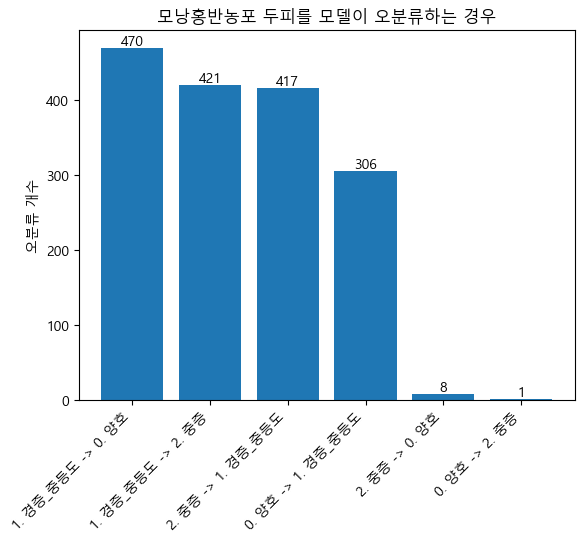

In [27]:
# 전체 데이터 개수
total_data_count = len(df)

# 조건을 만족하는 데이터 개수를 구하는 함수
def get_count(true_condition, pred_condition):
    return len(df[(df['true_label'] == true_condition) & (df['predicted_label'] == pred_condition)])

# 간단하게 표시될 true_label과 predicted_label 값 정의
labels_map = {
    '[원천]모낭홍반농포_0.양호': '0. 양호',
    '[원천]모낭홍반농포_1.경증_중등도': '1. 경증_중등도',
    '[원천]모낭홍반농포_2.중증': '2. 중증'
}

# 전체 경우의 수 (true_label과 predicted_label이 같지 않은 경우만 포함)
true_labels = [
    '[원천]모낭홍반농포_0.양호', 
    '[원천]모낭홍반농포_1.경증_중등도', 
    '[원천]모낭홍반농포_2.중증'
]
pred_labels = [
    '[원천]모낭홍반농포_0.양호', 
    '[원천]모낭홍반농포_1.경증_중등도', 
    '[원천]모낭홍반농포_2.중증'
]

# true_label과 predicted_label이 같지 않은 경우만 포함
conditions = [(true, pred) for true in true_labels for pred in pred_labels if true != pred]
counts = [get_count(true, pred) for true, pred in conditions]
labels = [f'{labels_map[true]} -> {labels_map[pred]}' for true, pred in conditions]

# 개수를 기준으로 내림차순 정렬
sorted_data = sorted(zip(counts, labels), reverse=True)
sorted_counts, sorted_labels = zip(*sorted_data)

# 바 그래프 그리기 (정렬된 데이터 사용)
plt.figure()
bars = plt.bar(sorted_labels, sorted_counts)  # 정렬된 개수로 출력

# 각 바 위에 개수 출력
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}', ha='center', va='bottom')

plt.title('모낭홍반농포 두피를 모델이 오분류하는 경우')
plt.ylabel('오분류 개수')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

In [41]:
df_class4 = pd.read_csv('./data/error(efficientnet_b1_focal-loss_cosine_lr=1e-3).csv')
df_class3 = pd.read_csv('./data/error(efficientnet_b1_focal-loss_cosine_lr=1e-3_class-3_epoch10).csv')

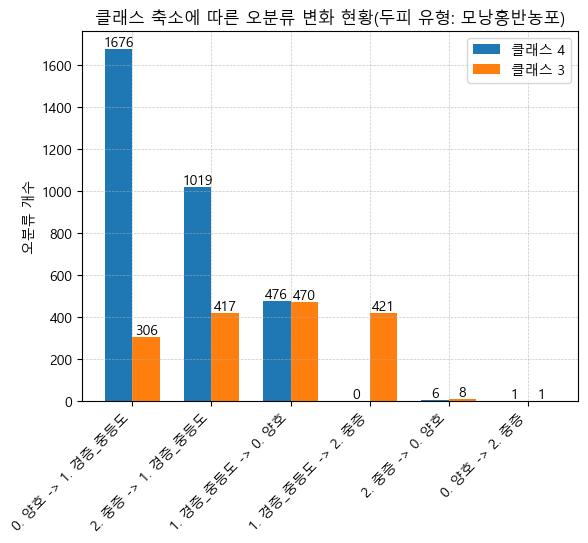

In [58]:
# 전체 데이터 개수
total_data_count_class4 = len(df_class4)
total_data_count_class3 = len(df_class3)

# 조건을 만족하는 데이터 개수를 구하는 함수
def get_count(df, true_condition, pred_condition):
    return len(df[(df['true_label'] == true_condition) & (df['predicted_label'] == pred_condition)])

# 아래 코드 기준 x축 정의 (6가지 경우)
x_labels_class3 = [
    '1. 경증_중등도 -> 0. 양호',
    '1. 경증_중등도 -> 2. 중증',
    '2. 중증 -> 0. 양호',
    '2. 중증 -> 1. 경증_중등도',
    '0. 양호 -> 1. 경증_중등도',
    '0. 양호 -> 2. 중증'
]

# 아래 코드에서 각 조건의 개수 계산
counts_class3 = {
    '1. 경증_중등도 -> 0. 양호': get_count(df_class3, '[원천]모낭홍반농포_1.경증_중등도', '[원천]모낭홍반농포_0.양호'),
    '1. 경증_중등도 -> 2. 중증': get_count(df_class3, '[원천]모낭홍반농포_1.경증_중등도', '[원천]모낭홍반농포_2.중증'),
    '2. 중증 -> 0. 양호': get_count(df_class3, '[원천]모낭홍반농포_2.중증', '[원천]모낭홍반농포_0.양호'),
    '2. 중증 -> 1. 경증_중등도': get_count(df_class3, '[원천]모낭홍반농포_2.중증', '[원천]모낭홍반농포_1.경증_중등도'),
    '0. 양호 -> 1. 경증_중등도': get_count(df_class3, '[원천]모낭홍반농포_0.양호', '[원천]모낭홍반농포_1.경증_중등도'),
    '0. 양호 -> 2. 중증': get_count(df_class3, '[원천]모낭홍반농포_0.양호', '[원천]모낭홍반농포_2.중증')
}

# 위 코드에서 합산하여 각 조건에 맞는 개수 계산
counts_class4 = {
    '1. 경증_중등도 -> 0. 양호': (
        get_count(df_class4, '[원천]모낭홍반농포_1.경증', '[원천]모낭홍반농포_0.양호') + 
        get_count(df_class4, '[원천]모낭홍반농포_2.중등도', '[원천]모낭홍반농포_0.양호')
    ),
    '1. 경증_중등도 -> 2. 중증': (
        get_count(df_class4, '[원천]모낭홍반농포_1.경증', '[원천]모낭홍반농포_2.중증') + 
        get_count(df_class4, '[원천]모낭홍반농포_2.중등도', '[원천]모낭홍반농포_2.중증')
    ),
    '2. 중증 -> 0. 양호': get_count(df_class4, '[원천]모낭홍반농포_3.중증', '[원천]모낭홍반농포_0.양호'),
    '2. 중증 -> 1. 경증_중등도': (
        get_count(df_class4, '[원천]모낭홍반농포_3.중증', '[원천]모낭홍반농포_1.경증') + 
        get_count(df_class4, '[원천]모낭홍반농포_3.중증', '[원천]모낭홍반농포_2.중등도')
    ),
    '0. 양호 -> 1. 경증_중등도': (
        get_count(df_class4, '[원천]모낭홍반농포_0.양호', '[원천]모낭홍반농포_1.경증') + 
        get_count(df_class4, '[원천]모낭홍반농포_0.양호', '[원천]모낭홍반농포_2.중등도')
    ),
    '0. 양호 -> 2. 중증': get_count(df_class4, '[원천]모낭홍반농포_0.양호', '[원천]모낭홍반농포_3.중증')
}

# 내림차순 정렬
sorted_data = sorted([(label, counts_class3[label], counts_class4[label]) for label in x_labels_class3], key=lambda x: x[1] + x[2], reverse=True)
sorted_labels, sorted_counts_class3, sorted_counts_class4 = zip(*sorted_data)

# 바 그래프 그리기
x = range(len(sorted_labels))
plt.figure()
bar_width = 0.35

# 클래스 4와 클래스 3의 바 그래프 (위치를 스위치)
bars_class4 = plt.bar(x, sorted_counts_class4, width=bar_width, label='클래스 4')
bars_class3 = plt.bar([p + bar_width for p in x], sorted_counts_class3, width=bar_width, label='클래스 3')

# 각 바 위에 개수 표시
for bar, count in zip(bars_class4, sorted_counts_class4):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}', ha='center', va='bottom')
for bar, count in zip(bars_class3, sorted_counts_class3):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}', ha='center', va='bottom')

# 그래프 설정
plt.title('클래스 축소에 따른 오분류 변화 현황(두피 유형: 모낭홍반농포)')
plt.ylabel('오분류 개수')
plt.xticks([p + bar_width / 2 for p in x], sorted_labels, rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()

### 클래스 3 & 클래스별 선택 확률(class 0)

- 양호인데 경증_중등도로 판단한 확률 확인하기 (오분류 비중 18.85%)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('./data/241023_nongpo_top_two_class_probabilities-class-0.csv')

In [20]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [29]:
df.head()

,image,top_class,top_probability,second_class,second_probability
0,8896_A2LEBJJDE001807_1606114122292_5_RH.jpg,[원천]모낭홍반농포_0.양호,0.632876,[원천]모낭홍반농포_1.경증_중등도,0.365799
1,7978_A2LEBJJDE00071B_1606645850546_3_TH.jpg,[원천]모낭홍반농포_0.양호,0.763776,[원천]모낭홍반농포_1.경증_중등도,0.233330
2,8000_A2LEBJJDE000956_1604739724977_5_RH.jpg,[원천]모낭홍반농포_0.양호,0.828036,[원천]모낭홍반농포_1.경증_중등도,0.170364
3,9414_A2LEBJJDE00033L_1605521474634_3_TH.jpg,[원천]모낭홍반농포_0.양호,0.795417,[원천]모낭홍반농포_1.경증_중등도,0.202855
4,7978_A2LEBJJDE00071B_1606818862603_5_RH.jpg,[원천]모낭홍반농포_0.양호,0.812924,[원천]모낭홍반농포_1.경증_중등도,0.183518


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image               152 non-null    object 
 1   top_class           152 non-null    object 
 2   top_probability     152 non-null    float64
 3   second_class        152 non-null    object 
 4   second_probability  152 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.1+ KB


In [55]:
# 오분류 했을 때, 몇 % 확률로 모델이 판단했나?
wrong_top_probability_mean = df[df['top_class'] != '[원천]모낭홍반농포_0.양호']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] != '[원천]모낭홍반농포_0.양호']['second_probability'].mean()

print(f'오분류 시, top_probability 평균: {wrong_top_probability_mean}')
print(f'오분류 시, second_probability 평균: {correct_second_probability_mean}')

오분류 시, top_probability 평균: 0.655519111
오분류 시, second_probability 평균: 0.33095695700000005


In [56]:
# 정분류 했을 때, 몇 % 확률로 모델이 판단했나?
correct_top_probability_mean = df[df['top_class'] == '[원천]모낭홍반농포_0.양호']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] == '[원천]모낭홍반농포_0.양호']['second_probability'].mean()

print(f'정분류 시, top_probability 평균: {correct_top_probability_mean}')
print(f'정분류 시, second_probability 평균: {correct_second_probability_mean}')

정분류 시, top_probability 평균: 0.7612921588028168
정분류 시, second_probability 평균: 0.23372121648591546


In [57]:
# 개수 확인
first_correct = df[(df['top_class'] == '[원천]모낭홍반농포_0.양호')].shape[0]
first_correct_second_wrong  = df[(df['top_class'] != '[원천]모낭홍반농포_0.양호') & (df['second_class'] == '[원천]모낭홍반농포_0.양호')].shape[0]
first_wrong_second_wrong = df[(df['top_class'] != '[원천]모낭홍반농포_0.양호') & (df['second_class'] != '[원천]모낭홍반농포_0.양호')].shape[0]

print(f'첫번째 정분류 개수: {first_correct}')
print(f'첫번째 오분류 & 두번째 정분류 개수: {first_correct_second_wrong}')
print(f'첫번째 오분류 & 두번째 오분류 개수: {first_wrong_second_wrong}')

첫번째 정분류 개수: 142
첫번째 오분류 & 두번째 정분류 개수: 10
첫번째 오분류 & 두번째 오분류 개수: 0


### 클래스 3 & 클래스별 선택 확률(class 1)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('./data/241023_nongpo_top_two_class_probabilities-class-1.csv')

In [4]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [63]:
df.head()

,image,top_class,top_probability,second_class,second_probability
0,6078_A2LEBJJDE00160J_1606098393934_2_TH.jpg,[원천]모낭홍반농포_1.경증_중등도,0.834005,[원천]모낭홍반농포_2.중증,0.136267
1,5436_A2LEBJJDE00098K_1607221471072_6_BH.jpg,[원천]모낭홍반농포_1.경증_중등도,0.744617,[원천]모낭홍반농포_2.중증,0.219122
2,2720_A2LEBJJDE000401_1606554316224_6_BH.jpg,[원천]모낭홍반농포_1.경증_중등도,0.781835,[원천]모낭홍반농포_0.양호,0.208132
3,0425_A2LEBJJDE00079P_1605793890748_2_TH.jpg,[원천]모낭홍반농포_1.경증_중등도,0.630043,[원천]모낭홍반농포_0.양호,0.361054
4,2326_A2LEBJJDE00037S_1606639821673_4_LH.jpg,[원천]모낭홍반농포_1.경증_중등도,0.593455,[원천]모낭홍반농포_2.중증,0.402667


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image               823 non-null    object 
 1   top_class           823 non-null    object 
 2   top_probability     823 non-null    float64
 3   second_class        823 non-null    object 
 4   second_probability  823 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.3+ KB


In [64]:
# 오분류 했을 때, 몇 % 확률로 모델이 판단했나?
wrong_top_probability_mean = df[df['top_class'] != '[원천]모낭홍반농포_1.경증_중등도	']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] != '[원천]모낭홍반농포_1.경증_중등도']['second_probability'].mean()

print(f'오분류 시, top_probability 평균: {wrong_top_probability_mean}')
print(f'오분류 시, second_probability 평균: {correct_second_probability_mean}')

오분류 시, top_probability 평균: 0.7647034051761847
오분류 시, second_probability 평균: 0.380664013255814


In [65]:
# 정분류 했을 때, 몇 % 확률로 모델이 판단했나?
correct_top_probability_mean = df[df['top_class'] == '[원천]모낭홍반농포_1.경증_중등도']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] == '[원천]모낭홍반농포_1.경증_중등도']['second_probability'].mean()

print(f'정분류 시, top_probability 평균: {correct_top_probability_mean}')
print(f'정분류 시, second_probability 평균: {correct_second_probability_mean}')

정분류 시, top_probability 평균: 0.7823704765128902
정분류 시, second_probability 평균: 0.19891116027272726


In [66]:
# 개수 확인
first_correct = df[(df['top_class'] == '[원천]모낭홍반농포_1.경증_중등도')].shape[0]
first_correct_second_wrong  = df[(df['top_class'] != '[원천]모낭홍반농포_1.경증_중등도') & (df['second_class'] == '[원천]모낭홍반농포_1.경증_중등도')].shape[0]
first_wrong_second_wrong = df[(df['top_class'] != '[원천]모낭홍반농포_1.경증_중등도') & (df['second_class'] != '[원천]모낭홍반농포_1.경증_중등도')].shape[0]

print(f'첫번째 정분류 개수: {first_correct}')
print(f'첫번째 오분류 & 두번째 정분류 개수: {first_correct_second_wrong}')
print(f'첫번째 오분류 & 두번째 오분류 개수: {first_wrong_second_wrong}')

첫번째 정분류 개수: 737
첫번째 오분류 & 두번째 정분류 개수: 86
첫번째 오분류 & 두번째 오분류 개수: 0


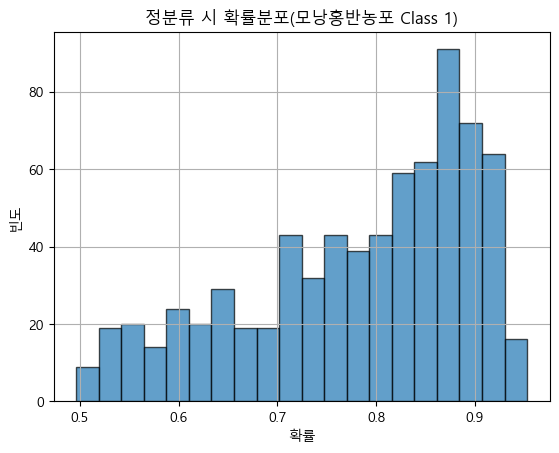

In [9]:
# 맞춘 확률을 필터링
matched_probs = df[df['top_class'] == '[원천]모낭홍반농포_1.경증_중등도']['top_probability']

# 히스토그램으로 확률 분포 시각화
plt.hist(matched_probs, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('확률')
plt.ylabel('빈도')
plt.title('정분류 시 확률분포(모낭홍반농포 Class 1)')
plt.grid(True)
plt.show()

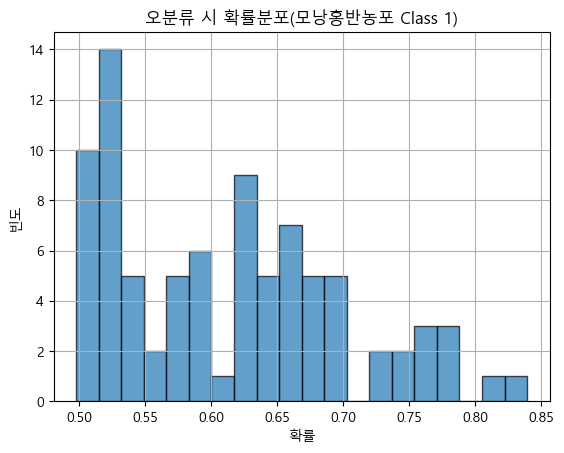

In [10]:
# 틀린 확률을 필터링
matched_probs = df[df['top_class'] != '[원천]모낭홍반농포_1.경증_중등도']['top_probability']

# 히스토그램으로 확률 분포 시각화
plt.hist(matched_probs, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('확률')
plt.ylabel('빈도')
plt.title('오분류 시 확률분포(모낭홍반농포 Class 1)')
plt.grid(True)
plt.show()

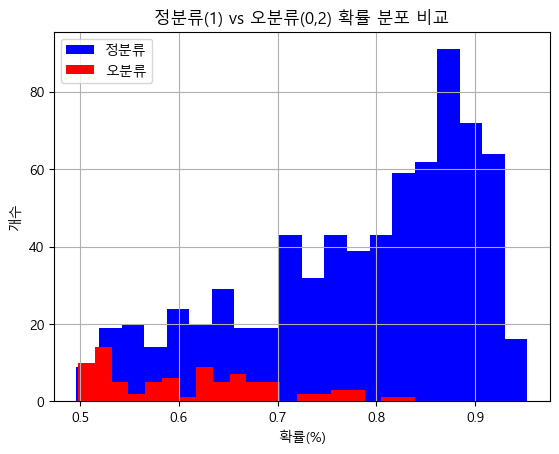

In [43]:
# 맞춘 확률과 틀린 확률 필터링
matched_probs = df[df['top_class'] == '[원천]모낭홍반농포_1.경증_중등도']['top_probability']
mismatched_probs = df[df['top_class'] != '[원천]모낭홍반농포_1.경증_중등도']['top_probability']

# KDE 플롯으로 겹쳐서 시각화
plt.hist(matched_probs, bins=20, color='blue', label='정분류')
plt.hist(mismatched_probs, bins=20, color='red', label='오분류')
plt.xlabel('확률(%)')
plt.ylabel('개수')
plt.title('정분류(1) vs 오분류(0,2) 확률 분포 비교')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11944\3359358495.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_probs, shade=True, color='blue', label='정분류')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11944\3359358495.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mismatched_probs, shade=True, color='red', label='오분류')


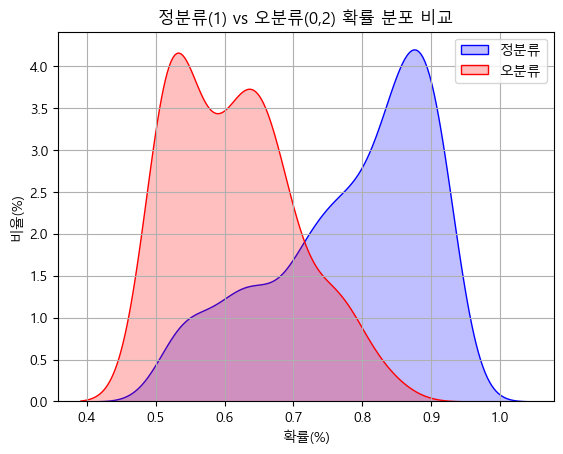

In [25]:
# 맞춘 확률과 틀린 확률 필터링
matched_probs = df[df['top_class'] == '[원천]모낭홍반농포_1.경증_중등도']['top_probability']
mismatched_probs = df[df['top_class'] != '[원천]모낭홍반농포_1.경증_중등도']['top_probability']

# KDE 플롯으로 겹쳐서 시각화
sns.kdeplot(matched_probs, shade=True, color='blue', label='정분류')
sns.kdeplot(mismatched_probs, shade=True, color='red', label='오분류')
plt.xlabel('확률(%)')
plt.ylabel('비율(%)')
plt.title('정분류(1) vs 오분류(0,2) 확률 분포 비교')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11944\2366857433.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_probs, shade=True, color='blue', label='정분류')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11944\2366857433.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mismatched_probs, shade=True, color='red', label='오분류')


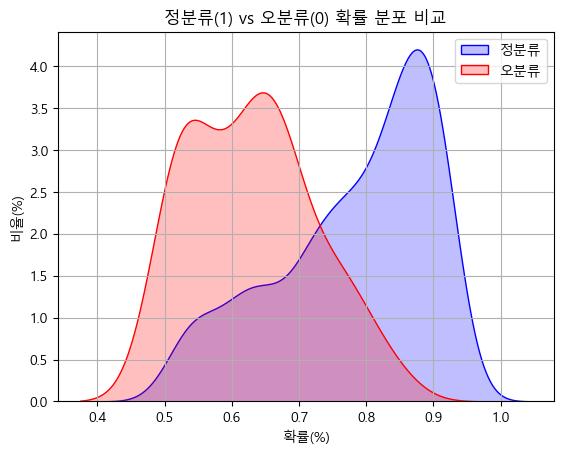

In [24]:
# 맞춘 확률과 틀린 확률 필터링
matched_probs = df[df['top_class'] == '[원천]모낭홍반농포_1.경증_중등도']['top_probability']
mismatched_probs = df[df['top_class'] == '[원천]모낭홍반농포_0.양호']['top_probability']

# KDE 플롯으로 겹쳐서 시각화
sns.kdeplot(matched_probs, shade=True, color='blue', label='정분류')
sns.kdeplot(mismatched_probs, shade=True, color='red', label='오분류')
plt.xlabel('확률(%)')
plt.ylabel('비율(%)')
plt.title('정분류(1) vs 오분류(0) 확률 분포 비교')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# 정답 판단 (top_class가 [원천]모낭홍반농포_1.경증_중등도이면 정답)
df['is_correct'] = df['top_class'] == '[원천]모낭홍반농포_1.경증_중등도'

# 기존 정확도 계산
original_accuracy = df['is_correct'].mean() * 100
print(f"Class 1 파일의 기존 정확도: {original_accuracy:.2f}%")

Class 1 파일의 기존 정확도: 89.55%


In [47]:
# 정확도 판단 로직
def determine_accuracy(row):
    if row['top_probability'] >= 0.45:
        # Top Probability가 75% 이상일 때, top_class가 [원천]모낭홍반농포_1.경증_중등도이면 정답
        return row['top_class'] == '[원천]모낭홍반농포_1.경증_중등도'
    elif row['top_probability'] <= 0.35:
        # Top Probability가 65% 이하일 때, second_class가 [원천]모낭홍반농포_1.경증_중등도이면 정답
        return row['second_class'] == '[원천]모낭홍반농포_1.경증_중등도'
    else:
        # 그 외의 경우 기존 정/오분류 판단 유지
        return row['top_class'] == '[원천]모낭홍반농포_1.경증_중등도'

# 각 행에 대해 정/오분류 확인
df['predicted_correct'] = df.apply(determine_accuracy, axis=1)

# 최종 정확도 계산
accuracy = df['predicted_correct'].mean() * 100
print(f"Class 1 파일의 최종 정확도: {accuracy:.2f}%")

Class 1 파일의 최종 정확도: 89.55%


### 클래스 3 & 클래스별 선택 확률(class 2)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('./data/241023_nongpo_top_two_class_probabilities-class-2.csv')

In [70]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [71]:
df.head()

,image,top_class,top_probability,second_class,second_probability
0,7851_A2LEBJJDE00074P_1607138090780_4_LH.jpg,[원천]모낭홍반농포_1.경증_중등도,0.875697,[원천]모낭홍반농포_0.양호,0.082360
1,9527_A2LEBJJDE00110E_1607148202934_3_TH.jpg,[원천]모낭홍반농포_2.중증,0.579687,[원천]모낭홍반농포_1.경증_중등도,0.419745
2,1221_A1LCAIHDH00009X_1609127442914_3_TH.jpg,[원천]모낭홍반농포_2.중증,0.564444,[원천]모낭홍반농포_1.경증_중등도,0.433378
3,3216_A1LCAIHDH00006J_1608979117419_4_LH.jpg,[원천]모낭홍반농포_2.중증,0.607206,[원천]모낭홍반농포_1.경증_중등도,0.390940
4,2404_A2LEBJJDE00020D_1609920522249_2_TH.jpg,[원천]모낭홍반농포_1.경증_중등도,0.625870,[원천]모낭홍반농포_2.중증,0.373639


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image               95 non-null     object 
 1   top_class           95 non-null     object 
 2   top_probability     95 non-null     float64
 3   second_class        95 non-null     object 
 4   second_probability  95 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.8+ KB


In [73]:
# 오분류 했을 때, 몇 % 확률로 모델이 판단했나?
wrong_top_probability_mean = df[df['top_class'] != '[원천]모낭홍반농포_2.중증']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] != '[원천]모낭홍반농포_2.중증']['second_probability'].mean()

print(f'오분류 시, top_probability 평균: {wrong_top_probability_mean}')
print(f'오분류 시, second_probability 평균: {correct_second_probability_mean}')

오분류 시, top_probability 평균: 0.6656700920000002
오분류 시, second_probability 평균: 0.30577025716666667


In [74]:
# 정분류 했을 때, 몇 % 확률로 모델이 판단했나?
correct_top_probability_mean = df[df['top_class'] == '[원천]모낭홍반농포_2.중증']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] == '[원천]모낭홍반농포_2.중증']['second_probability'].mean()

print(f'정분류 시, top_probability 평균: {correct_top_probability_mean}')
print(f'정분류 시, second_probability 평균: {correct_second_probability_mean}')

정분류 시, top_probability 평균: 0.6987815213846154
정분류 시, second_probability 평균: 0.29849398553846157


In [75]:
# 개수 확인
first_correct = df[(df['top_class'] == '[원천]모낭홍반농포_2.중증')].shape[0]
first_correct_second_wrong  = df[(df['top_class'] != '[원천]모낭홍반농포_2.중증') & (df['second_class'] == '[원천]모낭홍반농포_2.중증')].shape[0]
first_wrong_second_wrong = df[(df['top_class'] != '[원천]모낭홍반농포_2.중증') & (df['second_class'] != '[원천]모낭홍반농포_2.중증')].shape[0]

print(f'첫번째 정분류 개수: {first_correct}')
print(f'첫번째 오분류 & 두번째 정분류 개수: {first_correct_second_wrong}')
print(f'첫번째 오분류 & 두번째 오분류 개수: {first_wrong_second_wrong}')

첫번째 정분류 개수: 65
첫번째 오분류 & 두번째 정분류 개수: 24
첫번째 오분류 & 두번째 오분류 개수: 6


### 클래스 0,1,2 전체 오분류 개수 확인

In [12]:
# 파일 리스트
file_names = [
    './data/241023_nongpo_top_two_class_val0_probabilities-class-0.csv',
    './data/241023_nongpo_top_two_class_val1_probabilities-class-1.csv',
    './data/241023_nongpo_top_two_class_val2_probabilities-class-2.csv'
]

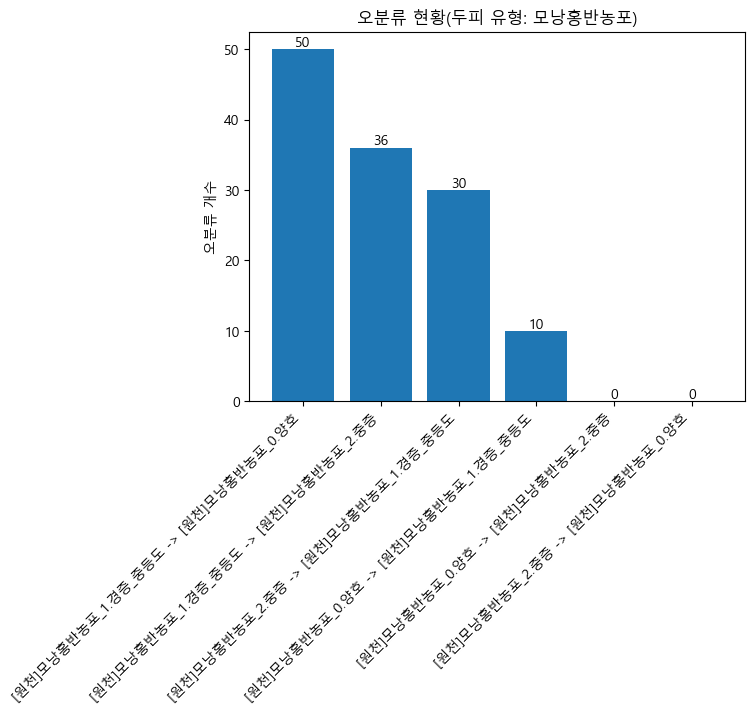

In [13]:
# 클래스 전환 조건에 맞는 타이틀 정의
misclassifications = {
    '[원천]모낭홍반농포_0.양호 -> [원천]모낭홍반농포_1.경증_중등도': 0,
    '[원천]모낭홍반농포_0.양호 -> [원천]모낭홍반농포_2.중증': 0,
    '[원천]모낭홍반농포_1.경증_중등도 -> [원천]모낭홍반농포_0.양호': 0,
    '[원천]모낭홍반농포_1.경증_중등도 -> [원천]모낭홍반농포_2.중증': 0,
    '[원천]모낭홍반농포_2.중증 -> [원천]모낭홍반농포_0.양호': 0,
    '[원천]모낭홍반농포_2.중증 -> [원천]모낭홍반농포_1.경증_중등도': 0
}

# 각 파일에 대한 오분류 개수 계산
for file_name in file_names:
    df = pd.read_csv(file_name)
    
    if 'val0' in file_name:
        misclassifications['[원천]모낭홍반농포_0.양호 -> [원천]모낭홍반농포_1.경증_중등도'] += len(df[(df['top_class'] != '[원천]모낭홍반농포_0.양호') & (df['top_class'] == '[원천]모낭홍반농포_1.경증_중등도')])
        misclassifications['[원천]모낭홍반농포_0.양호 -> [원천]모낭홍반농포_2.중증'] += len(df[(df['top_class'] != '[원천]모낭홍반농포_0.양호') & (df['top_class'] == '[원천]모낭홍반농포_2.중증')])
    
    elif 'val1' in file_name:
        misclassifications['[원천]모낭홍반농포_1.경증_중등도 -> [원천]모낭홍반농포_0.양호'] += len(df[(df['top_class'] != '[원천]모낭홍반농포_1.경증_중등도') & (df['top_class'] == '[원천]모낭홍반농포_0.양호')])
        misclassifications['[원천]모낭홍반농포_1.경증_중등도 -> [원천]모낭홍반농포_2.중증'] += len(df[(df['top_class'] != '[원천]모낭홍반농포_1.경증_중등도') & (df['top_class'] == '[원천]모낭홍반농포_2.중증')])
    
    elif 'val2' in file_name:
        misclassifications['[원천]모낭홍반농포_2.중증 -> [원천]모낭홍반농포_0.양호'] += len(df[(df['top_class'] != '[원천]모낭홍반농포_2.중증') & (df['top_class'] == '[원천]모낭홍반농포_0.양호')])
        misclassifications['[원천]모낭홍반농포_2.중증 -> [원천]모낭홍반농포_1.경증_중등도'] += len(df[(df['top_class'] != '[원천]모낭홍반농포_2.중증') & (df['top_class'] == '[원천]모낭홍반농포_1.경증_중등도')])

# 개수를 기준으로 내림차순 정렬
sorted_data = sorted(misclassifications.items(), key=lambda x: x[1], reverse=True)
sorted_labels, sorted_counts = zip(*sorted_data)

# 데이터 시각화
plt.figure()
bars = plt.bar(sorted_labels, sorted_counts)

# 각 바 위에 개수 표시
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}', ha='center', va='bottom')

plt.title('오분류 현황(두피 유형: 모낭홍반농포)')
plt.ylabel('오분류 개수')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

# 오분류 데이터 분석(두피유형: 비듬)

### 클래스 4

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./data/error(bidum)(efficientnet_b1_focal-loss_cosine_lr=1e-3).csv')

In [6]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [7]:
df.head()

,epoch,filename,true_label,predicted_label
0,0,./data/validation/[원천]비듬_0.양호/6995_A2LEBJJDE00...,[원천]비듬_0.양호,[원천]비듬_1.경증
1,0,./data/validation/[원천]비듬_0.양호/7027_A2LEBJJDE00...,[원천]비듬_0.양호,[원천]비듬_1.경증
2,0,./data/validation/[원천]비듬_0.양호/7027_A2LEBJJDE00...,[원천]비듬_0.양호,[원천]비듬_1.경증
3,0,./data/validation/[원천]비듬_0.양호/7027_A2LEBJJDE00...,[원천]비듬_0.양호,[원천]비듬_1.경증
4,0,./data/validation/[원천]비듬_0.양호/7027_A2LEBJJDE00...,[원천]비듬_0.양호,[원천]비듬_1.경증


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11877 entries, 0 to 11876
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   epoch            11877 non-null  int64 
 1   filename         11877 non-null  object
 2   true_label       11877 non-null  object
 3   predicted_label  11877 non-null  object
dtypes: int64(1), object(3)
memory usage: 371.3+ KB


In [9]:
df['epoch'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

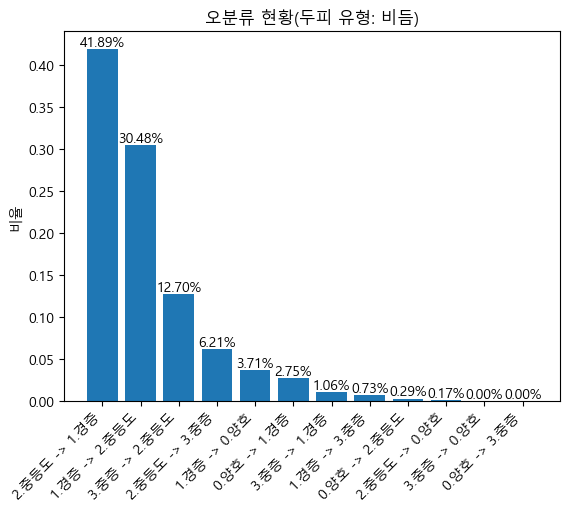

In [23]:
# 전체 데이터 개수
total_data_count = len(df)

# 조건을 만족하는 데이터 개수를 구하는 함수
def get_count(true_condition, pred_condition):
    return len(df[(df['true_label'] == true_condition) & (df['predicted_label'] == pred_condition)])

# 간단하게 표시될 true_label과 predicted_label 값 정의
labels_map = {
    '[원천]비듬_0.양호': '0.양호',
    '[원천]비듬_1.경증': '1.경증',
    '[원천]비듬_2.중등도': '2.중등도',
    '[원천]비듬_3.중증': '3.중증'
}

# 전체 경우의 수 (true_label과 predicted_label이 같지 않은 경우만 포함)
true_labels = [
    '[원천]비듬_0.양호', 
    '[원천]비듬_1.경증', 
    '[원천]비듬_2.중등도', 
    '[원천]비듬_3.중증'
]
pred_labels = [
    '[원천]비듬_0.양호', 
    '[원천]비듬_1.경증', 
    '[원천]비듬_2.중등도', 
    '[원천]비듬_3.중증'
]

# true_label과 predicted_label이 같지 않은 경우만 포함
conditions = [(true, pred) for true in true_labels for pred in pred_labels if true != pred]
counts = [get_count(true, pred) for true, pred in conditions]
ratios = [count / total_data_count for count in counts]  # 비율 계산
labels = [f'{labels_map[true]} -> {labels_map[pred]}' for true, pred in conditions]

# 비율을 기준으로 내림차순 정렬
sorted_data = sorted(zip(ratios, labels), reverse=True)
sorted_ratios, sorted_labels = zip(*sorted_data)

# 바 그래프 그리기
plt.figure()
bars = plt.bar(sorted_labels, sorted_ratios)  # 비율로 출력

# 각 바 위에 비율 출력 (소수점 2자리까지)
for bar, ratio in zip(bars, sorted_ratios):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{ratio:.2%}', ha='center', va='bottom')

plt.title('오분류 현황(두피 유형: 비듬)')
plt.ylabel('비율')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

1. 72.37%가 중등도와 경증을 구분하지 못함.
2. 18.91%가 중등도와 중증을 구분하지 못함.

In [59]:
(100-73.8)*0.7237

18.96094

In [60]:
73.8+18.96

92.75999999999999

### 클래스 4 & Gray Scale

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('./data/error(bidum)(efficientnet_b1_focal-loss_cosine_lr=1e-3_transform-gray-train-val).csv')

In [49]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [50]:
df.head()

,epoch,filename,true_label,predicted_label
0,0,./data/validation/[원천]비듬_0.양호/6995_A2LEBJJDE00...,[원천]비듬_0.양호,[원천]비듬_1.경증
1,0,./data/validation/[원천]비듬_0.양호/7027_A2LEBJJDE00...,[원천]비듬_0.양호,[원천]비듬_1.경증
2,0,./data/validation/[원천]비듬_0.양호/7027_A2LEBJJDE00...,[원천]비듬_0.양호,[원천]비듬_1.경증
3,0,./data/validation/[원천]비듬_0.양호/7027_A2LEBJJDE00...,[원천]비듬_0.양호,[원천]비듬_1.경증
4,0,./data/validation/[원천]비듬_0.양호/7027_A2LEBJJDE00...,[원천]비듬_0.양호,[원천]비듬_1.경증


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12194 entries, 0 to 12193
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   epoch            12194 non-null  int64 
 1   filename         12194 non-null  object
 2   true_label       12194 non-null  object
 3   predicted_label  12194 non-null  object
dtypes: int64(1), object(3)
memory usage: 381.2+ KB


In [52]:
df['epoch'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

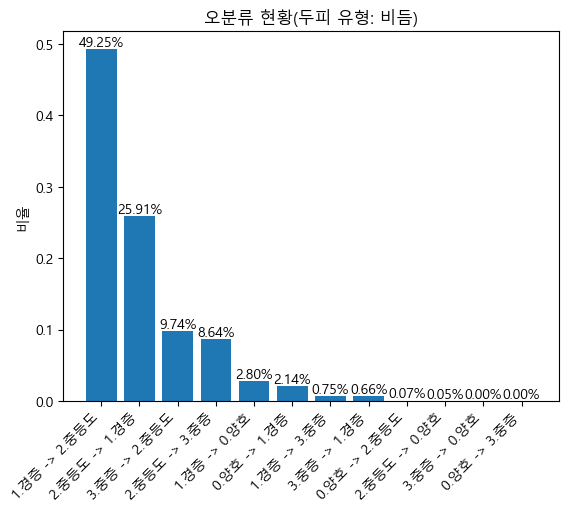

In [53]:
# 전체 데이터 개수
total_data_count = len(df)

# 조건을 만족하는 데이터 개수를 구하는 함수
def get_count(true_condition, pred_condition):
    return len(df[(df['true_label'] == true_condition) & (df['predicted_label'] == pred_condition)])

# 간단하게 표시될 true_label과 predicted_label 값 정의
labels_map = {
    '[원천]비듬_0.양호': '0.양호',
    '[원천]비듬_1.경증': '1.경증',
    '[원천]비듬_2.중등도': '2.중등도',
    '[원천]비듬_3.중증': '3.중증'
}

# 전체 경우의 수 (true_label과 predicted_label이 같지 않은 경우만 포함)
true_labels = [
    '[원천]비듬_0.양호', 
    '[원천]비듬_1.경증', 
    '[원천]비듬_2.중등도', 
    '[원천]비듬_3.중증'
]
pred_labels = [
    '[원천]비듬_0.양호', 
    '[원천]비듬_1.경증', 
    '[원천]비듬_2.중등도', 
    '[원천]비듬_3.중증'
]

# true_label과 predicted_label이 같지 않은 경우만 포함
conditions = [(true, pred) for true in true_labels for pred in pred_labels if true != pred]
counts = [get_count(true, pred) for true, pred in conditions]
ratios = [count / total_data_count for count in counts]  # 비율 계산
labels = [f'{labels_map[true]} -> {labels_map[pred]}' for true, pred in conditions]

# 비율을 기준으로 내림차순 정렬
sorted_data = sorted(zip(ratios, labels), reverse=True)
sorted_ratios, sorted_labels = zip(*sorted_data)

# 바 그래프 그리기
plt.figure()
bars = plt.bar(sorted_labels, sorted_ratios)  # 비율로 출력

# 각 바 위에 비율 출력 (소수점 2자리까지)
for bar, ratio in zip(bars, sorted_ratios):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{ratio:.2%}', ha='center', va='bottom')

plt.title('오분류 현황(두피 유형: 비듬)')
plt.ylabel('비율')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

1. 75.16%가 중등도와 경증을 구분하지 못함.
   - 앞선 그래프와 비교하면, Gray scale로 변경했을 때 모델이 더 헷갈려한다.
2. 18.38%가 중등도와 중증을 구분하지 못함.
   - 앞선 그래프와 비교하면, 덜 헷갈려 한다.

∴ 어차피 중등도와 경증은 하나의 label로 변경할 것이고, 중등도와 중증을 덜 헷갈려하면 이 케이스로 변경하는게 맞다.

In [57]:
(100-72.7)*0.7516

20.51868

In [58]:
72.7+20.52

93.22

### 클래스 3 & Gray Scale

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('./data/error(bidum)(efficientnet_b1_focal-loss_cosine_lr=1e-3_transform-gray-train-val_3-class).csv')

In [20]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

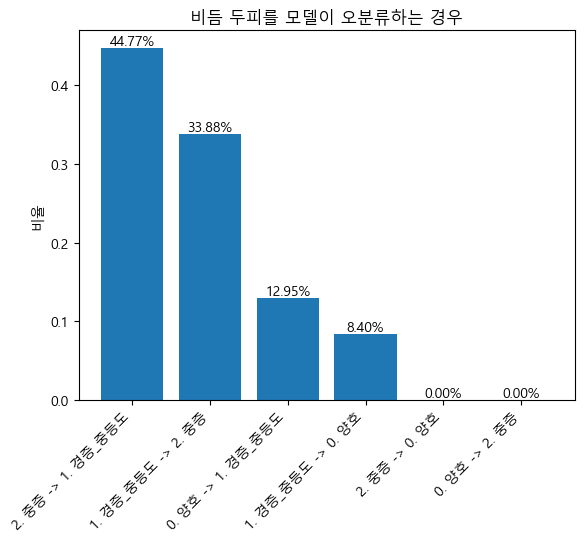

In [17]:
# 전체 데이터 개수
total_data_count = len(df)

# 조건을 만족하는 데이터 개수를 구하는 함수
def get_count(true_condition, pred_condition):
    return len(df[(df['true_label'] == true_condition) & (df['predicted_label'] == pred_condition)])

# 간단하게 표시될 true_label과 predicted_label 값 정의
labels_map = {
    '[원천]비듬_0.양호': '0. 양호',
    '[원천]비듬_1.경증_중등도': '1. 경증_중등도',
    '[원천]비듬_2.중증': '2. 중증'
}

# 전체 경우의 수 (true_label과 predicted_label이 같지 않은 경우만 포함)
true_labels = [
    '[원천]비듬_0.양호', 
    '[원천]비듬_1.경증_중등도', 
    '[원천]비듬_2.중증'
]
pred_labels = [
    '[원천]비듬_0.양호', 
    '[원천]비듬_1.경증_중등도', 
    '[원천]비듬_2.중증'
]

# true_label과 predicted_label이 같지 않은 경우만 포함
conditions = [(true, pred) for true in true_labels for pred in pred_labels if true != pred]
counts = [get_count(true, pred) for true, pred in conditions]
ratios = [count / total_data_count for count in counts]  # 비율 계산
labels = [f'{labels_map[true]} -> {labels_map[pred]}' for true, pred in conditions]

# 비율을 기준으로 내림차순 정렬
sorted_data = sorted(zip(ratios, labels), reverse=True)
sorted_ratios, sorted_labels = zip(*sorted_data)

# 바 그래프 그리기 (정렬된 데이터 사용)
plt.figure()
bars = plt.bar(sorted_labels, sorted_ratios)  # 정렬된 비율로 출력

# 각 바 위에 비율 출력 (소수점 2자리까지)
for bar, ratio in zip(bars, sorted_ratios):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{ratio:.2%}', ha='center', va='bottom')

plt.title('비듬 두피를 모델이 오분류하는 경우')
plt.ylabel('비율')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

1. 경증_중등도와 중증 오분류: 78.65%
2. 경증_중등도와 양호 오분류: 21.35%

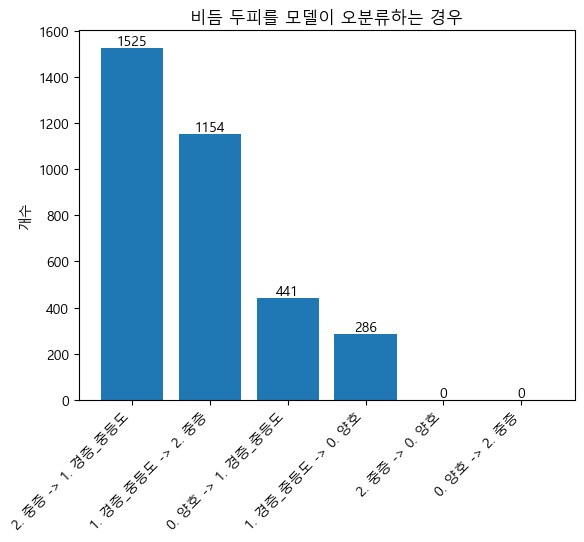

In [22]:
# 전체 데이터 개수
total_data_count = len(df)

# 조건을 만족하는 데이터 개수를 구하는 함수
def get_count(true_condition, pred_condition):
    return len(df[(df['true_label'] == true_condition) & (df['predicted_label'] == pred_condition)])

# 간단하게 표시될 true_label과 predicted_label 값 정의
labels_map = {
    '[원천]비듬_0.양호': '0. 양호',
    '[원천]비듬_1.경증_중등도': '1. 경증_중등도',
    '[원천]비듬_2.중증': '2. 중증'
}

# 전체 경우의 수 (true_label과 predicted_label이 같지 않은 경우만 포함)
true_labels = [
    '[원천]비듬_0.양호', 
    '[원천]비듬_1.경증_중등도', 
    '[원천]비듬_2.중증'
]
pred_labels = [
    '[원천]비듬_0.양호', 
    '[원천]비듬_1.경증_중등도', 
    '[원천]비듬_2.중증'
]

# true_label과 predicted_label이 같지 않은 경우만 포함
conditions = [(true, pred) for true in true_labels for pred in pred_labels if true != pred]
counts = [get_count(true, pred) for true, pred in conditions]  # 개수 계산
labels = [f'{labels_map[true]} -> {labels_map[pred]}' for true, pred in conditions]

# 개수를 기준으로 내림차순 정렬
sorted_data = sorted(zip(counts, labels), reverse=True)
sorted_counts, sorted_labels = zip(*sorted_data)

# 바 그래프 그리기 (정렬된 데이터 사용)
plt.figure()
bars = plt.bar(sorted_labels, sorted_counts)  # 정렬된 개수로 출력

# 각 바 위에 개수 출력
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}', ha='center', va='bottom')

plt.title('비듬 두피를 모델이 오분류하는 경우')
plt.ylabel('개수')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

In [16]:
12.95+8.40

21.35

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

### 클래스 3 & 클래스별 선택 확률(class 0)

In [77]:
df = pd.read_csv('./data/241023_bidum_top_two_class_probabilities-class-0.csv')

In [78]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [79]:
df.head()

,image,top_class,top_probability,second_class,second_probability
0,8896_A2LEBJJDE001807_1606114122292_5_RH.jpg,[원천]비듬_0.양호,0.575847,[원천]비듬_1.경증_중등도,0.423691
1,7978_A2LEBJJDE00071B_1606645850546_3_TH.jpg,[원천]비듬_1.경증_중등도,0.568972,[원천]비듬_0.양호,0.428658
2,8000_A2LEBJJDE000956_1604739724977_5_RH.jpg,[원천]비듬_1.경증_중등도,0.703149,[원천]비듬_0.양호,0.294788
3,9414_A2LEBJJDE00033L_1605521474634_3_TH.jpg,[원천]비듬_0.양호,0.737017,[원천]비듬_1.경증_중등도,0.262564
4,7978_A2LEBJJDE00071B_1606818862603_5_RH.jpg,[원천]비듬_0.양호,0.802945,[원천]비듬_1.경증_중등도,0.196921


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image               152 non-null    object 
 1   top_class           152 non-null    object 
 2   top_probability     152 non-null    float64
 3   second_class        152 non-null    object 
 4   second_probability  152 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.1+ KB


In [81]:
# 오분류 했을 때, 몇 % 확률로 모델이 판단했나?
wrong_top_probability_mean = df[df['top_class'] != '[원천]비듬_0.양호']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] != '[원천]비듬_0.양호']['second_probability'].mean()

print(f'오분류 시, top_probability 평균: {wrong_top_probability_mean}')
print(f'오분류 시, second_probability 평균: {correct_second_probability_mean}')

오분류 시, top_probability 평균: 0.7057580979545455
오분류 시, second_probability 평균: 0.2828307135681818


In [82]:
# 정분류 했을 때, 몇 % 확률로 모델이 판단했나?
correct_top_probability_mean = df[df['top_class'] == '[원천]비듬_0.양호']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] == '[원천]비듬_0.양호']['second_probability'].mean()

print(f'정분류 시, top_probability 평균: {correct_top_probability_mean}')
print(f'정분류 시, second_probability 평균: {correct_second_probability_mean}')

정분류 시, top_probability 평균: 0.7242579232407407
정분류 시, second_probability 평균: 0.2749683047222222


In [83]:
# 개수 확인
first_correct = df[(df['top_class'] == '[원천]비듬_0.양호')].shape[0]
first_correct_second_wrong  = df[(df['top_class'] != '[원천]비듬_0.양호') & (df['second_class'] == '[원천]비듬_0.양호')].shape[0]
first_wrong_second_wrong = df[(df['top_class'] != '[원천]비듬_0.양호') & (df['second_class'] != '[원천]비듬_0.양호')].shape[0]

print(f'첫번째 정분류 개수: {first_correct}')
print(f'첫번째 오분류 & 두번째 정분류 개수: {first_correct_second_wrong}')
print(f'첫번째 오분류 & 두번째 오분류 개수: {first_wrong_second_wrong}')

첫번째 정분류 개수: 108
첫번째 오분류 & 두번째 정분류 개수: 39
첫번째 오분류 & 두번째 오분류 개수: 5


### 클래스 3 & 클래스별 선택 확률(class 1)

In [84]:
df = pd.read_csv('./data/241023_bidum_top_two_class_probabilities-class-1.csv')

In [85]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [86]:
df.head()

,image,top_class,top_probability,second_class,second_probability
0,0643_A2LEBJJDE00048F_1606713761766_6_BH.jpg,[원천]비듬_1.경증_중등도,0.711113,[원천]비듬_0.양호,0.287998
1,2278_A2LEBJJDE00181Z_1606655853922_4_LH.jpg,[원천]비듬_1.경증_중등도,0.898238,[원천]비듬_2.중증,0.095730
2,8896_A2LEBJJDE001807_1606527714266_4_LH.jpg,[원천]비듬_1.경증_중등도,0.920896,[원천]비듬_2.중증,0.075973
3,6437_A1LCAIHDH00019R_1607654449537_2_TH.jpg,[원천]비듬_1.경증_중등도,0.709570,[원천]비듬_0.양호,0.287432
4,0715_A2LEBJJDE00175D_1606881860916_4_LH.jpg,[원천]비듬_1.경증_중등도,0.724325,[원천]비듬_2.중증,0.275196


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7452 entries, 0 to 7451
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image               7452 non-null   object 
 1   top_class           7452 non-null   object 
 2   top_probability     7452 non-null   float64
 3   second_class        7452 non-null   object 
 4   second_probability  7452 non-null   float64
dtypes: float64(2), object(3)
memory usage: 291.2+ KB


In [88]:
# 오분류 했을 때, 몇 % 확률로 모델이 판단했나?
wrong_top_probability_mean = df[df['top_class'] != '[원천]비듬_1.경증_중등도']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] != '[원천]비듬_1.경증_중등도']['second_probability'].mean()

print(f'오분류 시, top_probability 평균: {wrong_top_probability_mean}')
print(f'오분류 시, second_probability 평균: {correct_second_probability_mean}')

오분류 시, top_probability 평균: 0.6208236210574712
오분류 시, second_probability 평균: 0.3780391270574713


In [89]:
# 정분류 했을 때, 몇 % 확률로 모델이 판단했나?
correct_top_probability_mean = df[df['top_class'] == '[원천]비듬_1.경증_중등도']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] == '[원천]비듬_1.경증_중등도']['second_probability'].mean()

print(f'정분류 시, top_probability 평균: {correct_top_probability_mean}')
print(f'정분류 시, second_probability 평균: {correct_second_probability_mean}')

정분류 시, top_probability 평균: 0.8361316481288299
정분류 시, second_probability 평균: 0.15196453493551376


In [90]:
# 개수 확인
first_correct = df[(df['top_class'] == '[원천]비듬_1.경증_중등도')].shape[0]
first_correct_second_wrong  = df[(df['top_class'] != '[원천]비듬_1.경증_중등도') & (df['second_class'] == '[원천]비듬_1.경증_중등도')].shape[0]
first_wrong_second_wrong = df[(df['top_class'] != '[원천]비듬_1.경증_중등도') & (df['second_class'] != '[원천]비듬_1.경증_중등도')].shape[0]

print(f'첫번째 정분류 개수: {first_correct}')
print(f'첫번째 오분류 & 두번째 정분류 개수: {first_correct_second_wrong}')
print(f'첫번째 오분류 & 두번째 오분류 개수: {first_wrong_second_wrong}')

첫번째 정분류 개수: 7017
첫번째 오분류 & 두번째 정분류 개수: 435
첫번째 오분류 & 두번째 오분류 개수: 0


### 클래스 3 & 클래스별 선택 확률(class 2)

In [91]:
df = pd.read_csv('./data/241023_bidum_top_two_class_probabilities-class-2.csv')

In [92]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [93]:
df.head()

,image,top_class,top_probability,second_class,second_probability
0,4370_A1LCAIHDH00005Q_1607732986459_2_TH.jpg,[원천]비듬_1.경증_중등도,0.599630,[원천]비듬_2.중증,0.400180
1,8212_A2LEBJJDE00070I_1607685986311_6_BH.jpg,[원천]비듬_1.경증_중등도,0.755746,[원천]비듬_2.중증,0.242324
2,9578_A2LEBJJDE00105K_1607580114068_4_LH.jpg,[원천]비듬_2.중증,0.666992,[원천]비듬_1.경증_중등도,0.333007
3,4370_A1LCAIHDH00005Q_1608191253692_2_TH.jpg,[원천]비듬_2.중증,0.718542,[원천]비듬_1.경증_중등도,0.281457
4,3269_A2LEBJJDE00096Y_1608251043338_5_RH.jpg,[원천]비듬_2.중증,0.568132,[원천]비듬_1.경증_중등도,0.431866


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image               644 non-null    object 
 1   top_class           644 non-null    object 
 2   top_probability     644 non-null    float64
 3   second_class        644 non-null    object 
 4   second_probability  644 non-null    float64
dtypes: float64(2), object(3)
memory usage: 25.3+ KB


In [95]:
# 오분류 했을 때, 몇 % 확률로 모델이 판단했나?
wrong_top_probability_mean = df[df['top_class'] != '[원천]비듬_2.중증']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] != '[원천]비듬_2.중증']['second_probability'].mean()

print(f'오분류 시, top_probability 평균: {wrong_top_probability_mean}')
print(f'오분류 시, second_probability 평균: {correct_second_probability_mean}')

오분류 시, top_probability 평균: 0.7006449985921325
오분류 시, second_probability 평균: 0.29444548632505174


In [96]:
# 정분류 했을 때, 몇 % 확률로 모델이 판단했나?
correct_top_probability_mean = df[df['top_class'] == '[원천]비듬_2.중증']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] == '[원천]비듬_2.중증']['second_probability'].mean()

print(f'정분류 시, top_probability 평균: {correct_top_probability_mean}')
print(f'정분류 시, second_probability 평균: {correct_second_probability_mean}')

정분류 시, top_probability 평균: 0.6126328642857144
정분류 시, second_probability 평균: 0.3873490413043479


In [97]:
# 개수 확인
first_correct = df[(df['top_class'] == '[원천]비듬_2.중증')].shape[0]
first_correct_second_wrong  = df[(df['top_class'] != '[원천]비듬_2.중증') & (df['second_class'] == '[원천]비듬_2.중증')].shape[0]
first_wrong_second_wrong = df[(df['top_class'] != '[원천]비듬_2.중증') & (df['second_class'] != '[원천]비듬_2.중증')].shape[0]

print(f'첫번째 정분류 개수: {first_correct}')
print(f'첫번째 오분류 & 두번째 정분류 개수: {first_correct_second_wrong}')
print(f'첫번째 오분류 & 두번째 오분류 개수: {first_wrong_second_wrong}')

첫번째 정분류 개수: 161
첫번째 오분류 & 두번째 정분류 개수: 465
첫번째 오분류 & 두번째 오분류 개수: 18


### 클래스 3 & 클래스별 선택 확률(class 0) & 데이터 불균형 개선

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./data/data_weight/bidum_val0_dynamic_weight_probabilities_01.csv')

In [5]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [6]:
df.head()

,image,top_class,top_probability,second_class,second_probability
0,8999_A2LEBJJDE00001I_1603366130935_3_TH.jpg,class_0,0.838068,class_1,0.145922
1,7988_A2LEBJJDE000357_1604810283861_4_LH.jpg,class_0,0.838301,class_1,0.145324
2,7418_A2LEBJJDE00080C_1606703809924_5_RH.jpg,class_0,0.783925,class_1,0.198684
3,8896_A2LEBJJDE001807_1606114122292_5_RH.jpg,class_0,0.707412,class_1,0.274323
4,8146_A2LEBJJDE00148A_1602926493870_6_BH.jpg,class_1,0.664454,class_0,0.168214


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image               152 non-null    object 
 1   top_class           152 non-null    object 
 2   top_probability     152 non-null    float64
 3   second_class        152 non-null    object 
 4   second_probability  152 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.1+ KB


In [8]:
# 오분류 했을 때, 몇 % 확률로 모델이 판단했나?
wrong_top_probability_mean = df[df['top_class'] != 'class_0']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] != 'class_0']['second_probability'].mean()

print(f'오분류 시, top_probability 평균: {wrong_top_probability_mean}')
print(f'오분류 시, second_probability 평균: {correct_second_probability_mean}')

오분류 시, top_probability 평균: 0.6368771583333334
오분류 시, second_probability 평균: 0.29828753066666663


In [9]:
# 정분류 했을 때, 몇 % 확률로 모델이 판단했나?
correct_top_probability_mean = df[df['top_class'] == 'class_0']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] == 'class_0']['second_probability'].mean()

print(f'정분류 시, top_probability 평균: {correct_top_probability_mean}')
print(f'정분류 시, second_probability 평균: {correct_second_probability_mean}')

정분류 시, top_probability 평균: 0.7777515777343751
정분류 시, second_probability 평균: 0.20184812879687497


In [10]:
# 개수 확인
first_correct = df[(df['top_class'] == 'class_0')].shape[0]
first_correct_second_wrong  = df[(df['top_class'] != 'class_0') & (df['second_class'] == 'class_0')].shape[0]
first_wrong_second_wrong = df[(df['top_class'] != 'class_0') & (df['second_class'] != 'class_0')].shape[0]

print(f'첫번째 정분류 개수: {first_correct}')
print(f'첫번째 오분류 & 두번째 정분류 개수: {first_correct_second_wrong}')
print(f'첫번째 오분류 & 두번째 오분류 개수: {first_wrong_second_wrong}')

첫번째 정분류 개수: 128
첫번째 오분류 & 두번째 정분류 개수: 16
첫번째 오분류 & 두번째 오분류 개수: 8


- 오분류 약 7% 개선
- 정분류 약 5% 개선
- 첫번째 정분류 약 20개 개선

### 클래스 3 & 클래스별 선택 확률(class 1) & 데이터 불균형 개선

In [11]:
df = pd.read_csv('./data/data_weight/bidum_val1_dynamic_weight_probabilities_01.csv')

In [12]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [13]:
df.head()

,image,top_class,top_probability,second_class,second_probability
0,4267_A1LCAIHDH00016D_1607854439118_5_RH.jpg,class_1,0.711587,class_2,0.273855
1,4370_A1LCAIHDH00005Q_1607929245283_5_RH.jpg,class_1,0.641815,class_0,0.289501
2,9874_A2LEBJJDE00123M_1606730321151_4_LH.jpg,class_1,0.666962,class_2,0.333007
3,7698_A2LEBJJDE00165J_1606460444782_2_TH.jpg,class_1,0.610928,class_2,0.388696
4,3216_A1LCAIHDH00006J_1607657154490_2_TH.jpg,class_1,0.562723,class_2,0.437032


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7452 entries, 0 to 7451
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image               7452 non-null   object 
 1   top_class           7452 non-null   object 
 2   top_probability     7452 non-null   float64
 3   second_class        7452 non-null   object 
 4   second_probability  7452 non-null   float64
dtypes: float64(2), object(3)
memory usage: 291.2+ KB


In [15]:
# 오분류 했을 때, 몇 % 확률로 모델이 판단했나?
wrong_top_probability_mean = df[df['top_class'] != 'class_1']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] != 'class_1']['second_probability'].mean()

print(f'오분류 시, top_probability 평균: {wrong_top_probability_mean}')
print(f'오분류 시, second_probability 평균: {correct_second_probability_mean}')

오분류 시, top_probability 평균: 0.5980417734895191
오분류 시, second_probability 평균: 0.3912850299753391


In [16]:
# 정분류 했을 때, 몇 % 확률로 모델이 판단했나?
correct_top_probability_mean = df[df['top_class'] == 'class_1']['top_probability'].mean()
correct_second_probability_mean = df[df['top_class'] == 'class_1']['second_probability'].mean()

print(f'정분류 시, top_probability 평균: {correct_top_probability_mean}')
print(f'정분류 시, second_probability 평균: {correct_second_probability_mean}')

정분류 시, top_probability 평균: 0.7242632697681072
정분류 시, second_probability 평균: 0.253678409924409


In [17]:
# 개수 확인
first_correct = df[(df['top_class'] == 'class_1')].shape[0]
first_correct_second_wrong  = df[(df['top_class'] != 'class_1') & (df['second_class'] == 'class_1')].shape[0]
first_wrong_second_wrong = df[(df['top_class'] != 'class_1') & (df['second_class'] != 'class_1')].shape[0]

print(f'첫번째 정분류 개수: {first_correct}')
print(f'첫번째 오분류 & 두번째 정분류 개수: {first_correct_second_wrong}')
print(f'첫번째 오분류 & 두번째 오분류 개수: {first_wrong_second_wrong}')

첫번째 정분류 개수: 6641
첫번째 오분류 & 두번째 정분류 개수: 811
첫번째 오분류 & 두번째 오분류 개수: 0


- 오분류 확률 약 3% 개선
- 정분류 확률 약 11% 악화
- 첫번째 정분류 약 400개 악화

### 클래스 0,1,2 전체 오분류 개수 확인

In [31]:
# 파일 리스트
file_names = [
    './data/241023_bidum_top_two_class_val0_probabilities-class-0.csv',
    './data/241023_bidum_top_two_class_val1_probabilities-class-1.csv',
    './data/241023_bidum_top_two_class_val2_probabilities-class-2.csv'
]

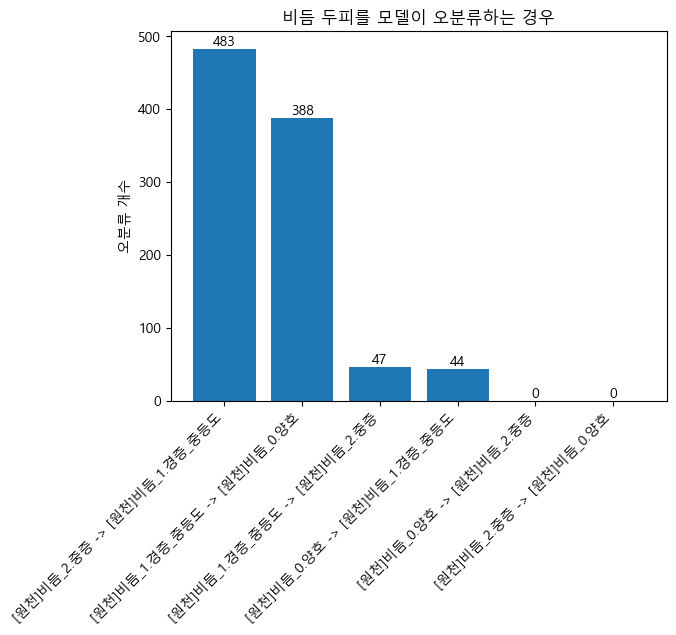

In [32]:
# 클래스 전환 조건에 맞는 타이틀 정의
misclassifications = {
    '[원천]비듬_0.양호 -> [원천]비듬_1.경증_중등도': 0,
    '[원천]비듬_0.양호 -> [원천]비듬_2.중증': 0,
    '[원천]비듬_1.경증_중등도 -> [원천]비듬_0.양호': 0,
    '[원천]비듬_1.경증_중등도 -> [원천]비듬_2.중증': 0,
    '[원천]비듬_2.중증 -> [원천]비듬_0.양호': 0,
    '[원천]비듬_2.중증 -> [원천]비듬_1.경증_중등도': 0
}

# 각 파일에 대한 오분류 개수 계산
for file_name in file_names:
    df = pd.read_csv(file_name)
    
    if 'val0' in file_name:
        misclassifications['[원천]비듬_0.양호 -> [원천]비듬_1.경증_중등도'] += len(df[(df['top_class'] != '[원천]비듬_0.양호') & (df['top_class'] == '[원천]비듬_1.경증_중등도')])
        misclassifications['[원천]비듬_0.양호 -> [원천]비듬_2.중증'] += len(df[(df['top_class'] != '[원천]비듬_0.양호') & (df['top_class'] == '[원천]비듬_2.중증')])
    
    elif 'val1' in file_name:
        misclassifications['[원천]비듬_1.경증_중등도 -> [원천]비듬_0.양호'] += len(df[(df['top_class'] != '[원천]비듬_1.경증_중등도') & (df['top_class'] == '[원천]비듬_0.양호')])
        misclassifications['[원천]비듬_1.경증_중등도 -> [원천]비듬_2.중증'] += len(df[(df['top_class'] != '[원천]비듬_1.경증_중등도') & (df['top_class'] == '[원천]비듬_2.중증')])
    
    elif 'val2' in file_name:
        misclassifications['[원천]비듬_2.중증 -> [원천]비듬_0.양호'] += len(df[(df['top_class'] != '[원천]비듬_2.중증') & (df['top_class'] == '[원천]비듬_0.양호')])
        misclassifications['[원천]비듬_2.중증 -> [원천]비듬_1.경증_중등도'] += len(df[(df['top_class'] != '[원천]비듬_2.중증') & (df['top_class'] == '[원천]비듬_1.경증_중등도')])

# 개수를 기준으로 내림차순 정렬
sorted_data = sorted(misclassifications.items(), key=lambda x: x[1], reverse=True)
sorted_labels, sorted_counts = zip(*sorted_data)

# 데이터 시각화
plt.figure()
bars = plt.bar(sorted_labels, sorted_counts)

# 각 바 위에 개수 표시
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}', ha='center', va='bottom')

plt.title('비듬 두피를 모델이 오분류하는 경우')
plt.ylabel('오분류 개수')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()